<a href="https://colab.research.google.com/github/MiaKuntz/machine_learning_2/blob/main/ML4BI_E4_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for BI 2

## (MORE) Deep Learning exercises for week 3

Load the newswire dataset from the exercises and prepare it to a neural network with two hidden layers.

Write a function that allows you to control whether a dropout is applied to each layer.

Finally, use the function to compare the validation lose curves for three different training runs: (1) dropout only in the first layer, (2) dropout only in the second layer, (3) dropout in the both layers, and (4) no dropout. Let the number of neurons in each run be the same, but think about what a reasonable number of neurons would be and why.

**Load and prepare the newswire dataset**

In [1]:
from tensorflow.keras.datasets import reuters # importing the reuters dataset from keras
import numpy as np # importing numpy
from tensorflow.keras.utils import to_categorical # importing to_categorical from keras.utils

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( # loading the reuters dataset into train_data, train_labels, test_data, test_labels
    num_words=10000) # only the top 10,000 most frequently occurring words in the training data

def vectorize_sequences(sequences, dimension=10000): # defining a function to vectorize the sequences with a dimension of 10,000 words 
    results = np.zeros((len(sequences), dimension)) # creating a numpy array of zeros with the length of the sequences and the dimension of 10,000 words 
    for i, sequence in enumerate(sequences): # for each sequence in the sequences
        for j in sequence: # for each word in the sequence
            results[i, j] = 1. # set the word to 1 in the results array 
    return results # return the results array

x_train = vectorize_sequences(train_data) # vectorizing the training data
x_test = vectorize_sequences(test_data) # vectorizing the test data

def to_one_hot(labels, dimension=46): # defining a function to one-hot encode the labels with a dimension of 46 (the number of classes in the dataset)
    results = np.zeros((len(labels), dimension)) # creating a numpy array of zeros with the length of the labels and the dimension of 46 classes
    for i, label in enumerate(labels): # for each label in the labels
        results[i, label] = 1. # set the label to 1 in the results array
    return results # return the results array

y_train = to_one_hot(train_labels) # one-hot encoding the training labels
y_test = to_one_hot(test_labels) # one-hot encoding the test labels

y_train = to_categorical(train_labels) # one-hot encoding the training labels using the to_categorical function from keras.utils
y_test = to_categorical(test_labels) # one-hot encoding the test labels using the to_categorical function from keras.utils

In [2]:
x_val = x_train[:1000] # setting the validation data to the first 1000 samples of the training data
partial_x_train = x_train[1000:] # setting the partial training data to the rest of the training data
y_val = y_train[:1000] # setting the validation labels to the first 1000 samples of the training labels
partial_y_train = y_train[1000:] # setting the partial training labels to the rest of the training labels

**Create the function**

In [3]:
from tensorflow import keras # importing keras from tensorflow
from tensorflow.keras import layers # importing layers from keras
import matplotlib.pyplot as plt # importing matplotlib.pyplot as plt

def train_model_with_dropout(partial_x_train, partial_y_train, x_val, y_val, dropout_positions, dropout_rate=0.5): # defining a function to train a model with dropout
    model = keras.Sequential() # creating a sequential model

    # Add the first dense layer
    model.add(layers.Dense(256, activation="relu")) # adding a dense layer with 256 units and a relu activation function
    if 'first' in dropout_positions: # if the first position is in the dropout positions
        model.add(layers.Dropout(dropout_rate)) # add a dropout layer with the dropout rate

    # Add the second dense layer 
    model.add(layers.Dense(256, activation="relu")) # adding a dense layer with 256 units and a relu activation function
    if 'last' in dropout_positions: # if the last position is in the dropout positions
        model.add(layers.Dropout(dropout_rate)) # add a dropout layer with the dropout rate

    # Add the output layer
    model.add(layers.Dense(46, activation="softmax")) # adding a dense layer with 46 units and a softmax activation function

    model.compile(optimizer="rmsprop", # compiling the model with the rmsprop optimizer
                  loss="categorical_crossentropy", # using categorical crossentropy as the loss function
                  metrics=["accuracy"]) # using accuracy as the metric

    history = model.fit(partial_x_train, # fitting the model to the partial training data 
                        partial_y_train, # fitting the model to the partial training labels
                        epochs=20, # training the model for 20 epochs
                        batch_size=512, # using a batch size of 512
                        validation_data=(x_val, y_val), # using the validation data for validation
                        verbose=0) # setting the verbose to 0 to not display the training progress

    return history.history['val_loss'] # returning the validation loss


Training model with dropout at: No Dropout
Training model with dropout at: First Layer
Training model with dropout at: Last Layer
Training model with dropout at: First and Last Layers


/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

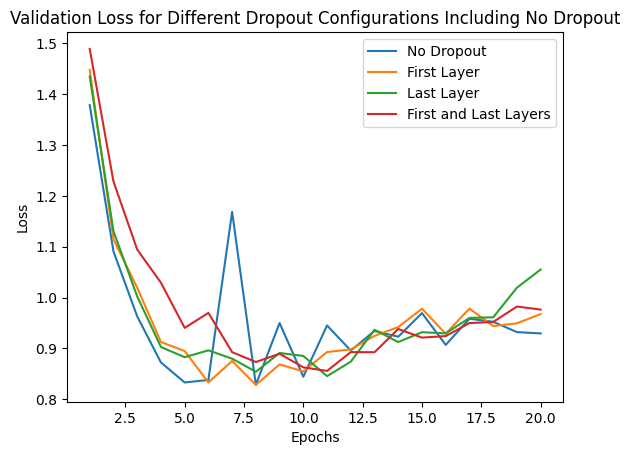

In [4]:
dropout_configs = { # defining the dropout configurations
    'No Dropout': [], # no dropout
    'First Layer': ['first'], # dropout in the first layer
    'Last Layer': ['last'], # dropout in the last layer
    'First and Last Layers': ['first', 'last'] # dropout in the first and last layers
}

# Assuming partial_x_train, partial_y_train, x_val, and y_val are defined
histories = {} # creating a dictionary to store the histories of the models

for config_name, positions in dropout_configs.items(): # for each configuration name and positions in the dropout configurations
    print(f"Training model with dropout at: {config_name}") # print the configuration name
    val_loss = train_model_with_dropout(partial_x_train, partial_y_train, x_val, y_val, positions) # train the model with dropout
    histories[config_name] = val_loss # store the validation loss in the histories dictionary

# Plotting
epochs = range(1, 21) # setting the epochs to a range from 1 to 21
for config_name, val_loss in histories.items(): # for each configuration name and validation loss in the histories dictionary
    plt.plot(epochs, val_loss, label=config_name) # plot the validation loss with the configuration name as the label

plt.title('Validation Loss for Different Dropout Configurations Including No Dropout') # setting the title of the plot
plt.xlabel('Epochs') # setting the x-axis label
plt.ylabel('Loss') # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot
# The plot shows the validation loss for different dropout configurations including no dropout
# The model with dropout in the first and last layers has the lowest validation loss